#Analysis
##Testing
Input:
> test.csv : All data and output from testing

Output:
> Confusion matrix for each detail
>> each detail accuracy : detail整體準確率、良品預測準確率、不良品預測準確率

>> Pictures of confusion matrix

> Error distribution histogram
>> Pictures of error distribution histogram

##Prediction
Input:
> pred.npy : Prediction output

Output:
> Pictures of error distribution histogram

#Testing



##Confusion matrix for each detail

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

partNo = "0162B00100" #料號編號

# put testing data and output file path, ex: 'test.csv'
data_all = pd.read_csv(folder_path+'test.csv')

"""
將csv檔案內資料整理為np array
"""
measure_true = data_all['measure_true'] #真實良品/不良品
measure_pred = data_all['measure_pred'] #預測良品/不良品

true_name = []
pred_name = []
for i in range(1,27):
  true_name.append('true'+str(i))
  pred_name.append('pred'+str(i))

Y_test = pd.DataFrame()
pred = pd.DataFrame()
for num in range(26):
  Y_test = pd.concat([Y_test, data_all[true_name[num]]],axis=1) #真實值
  pred = pd.concat([pred, data_all[pred_name[num]]],axis=1)     #預測值

Y_test = np.array(Y_test)
pred = np.array(pred)

print(measure_true.shape) #(data_num)
print(measure_pred.shape) #(data_num)
print(Y_test.shape)       #(data_num, output_num)
print(pred.shape)         #(data_num, output_num)

Mounted at /content/drive
(144,)
(144,)
(144, 26)
(144, 26)


In [ ]:
"""
規格判斷 for detail, 以單筆資料判斷良品/不良品
data可以是真實或預測結果, partNo為料號編號, num為資料編號
"""
def measure_std_detail(data, partNo, num):
  detail_num = num
  partNo = partNo
  if partNo == "0162B00100":
    max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  elif partNo == "0162B01100":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B01100-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  else:
    return "Error"

  wrong = False

  if data[detail_num] > max_std[detail_num] or data[detail_num] < min_std[detail_num]:
    wrong = True
  
  if data[detail_num+13] > max_std[detail_num] or data[detail_num+13] < min_std[detail_num]: 
    wrong = True

  return wrong #不良品=True, 良品=False

detail  1
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


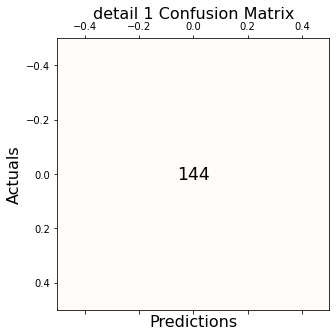

detail  2
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


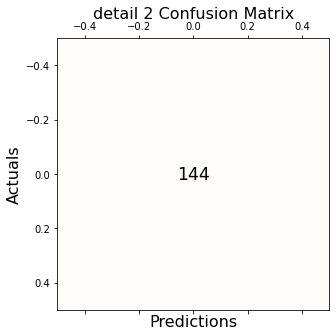

detail  3
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


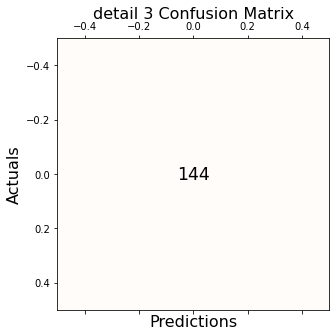

detail  4
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


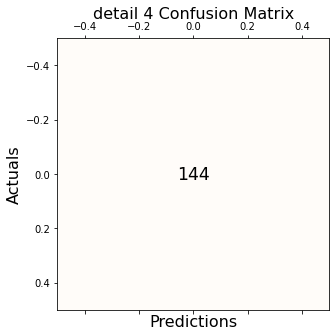

detail  5
實際值良品： 143 個
實際值良品 & 預測值良品： 143 個
良品預測準確率： 1.0

實際值不良品： 1 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 0.0

準確率： 0.9930555555555556


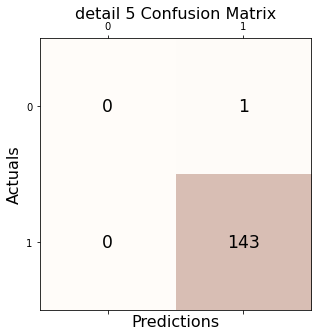

detail  6
實際值良品： 144 個
實際值良品 & 預測值良品： 141 個
良品預測準確率： 0.9791666666666666

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 0.9791666666666666


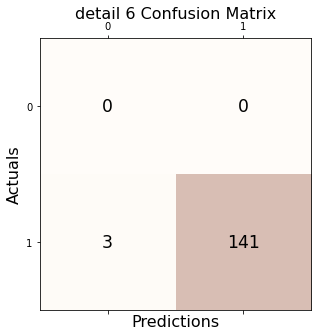

detail  7
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


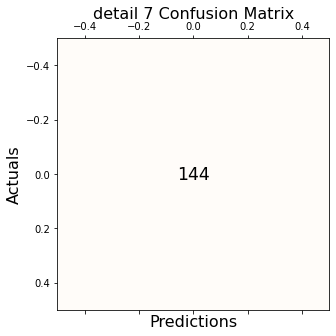

detail  8
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


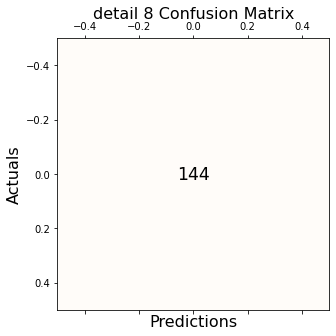

detail  9
實際值良品： 144 個
實際值良品 & 預測值良品： 143 個
良品預測準確率： 0.9930555555555556

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 0.9930555555555556


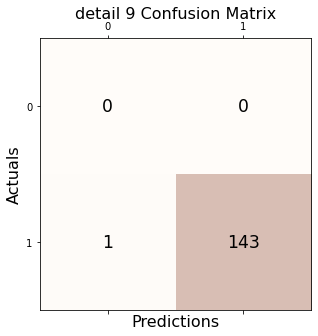

detail  10
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


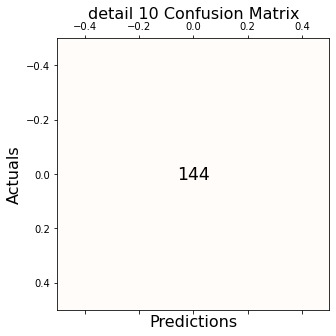

detail  11
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


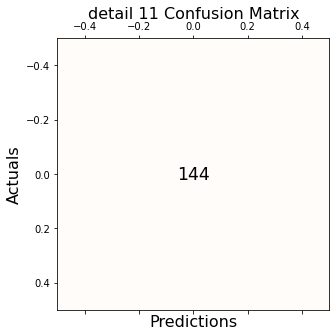

detail  12
實際值良品： 144 個
實際值良品 & 預測值良品： 143 個
良品預測準確率： 0.9930555555555556

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 0.9930555555555556


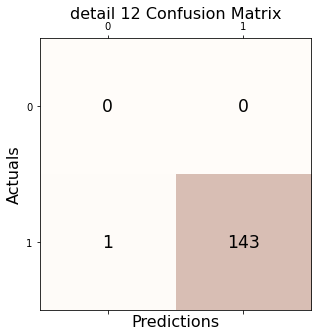

detail  13
實際值良品： 144 個
實際值良品 & 預測值良品： 144 個
良品預測準確率： 1.0

實際值不良品： 0 個
實際值不良品 & 預測值不良品： 0 個
不良品預測準確率： 無不良品

準確率： 1.0


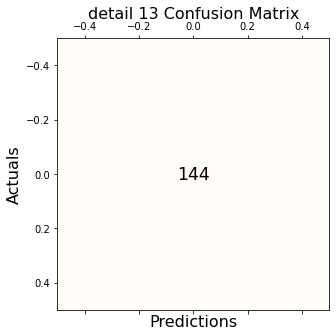

In [ ]:
"""
計算各detail的個數及準確率, confusion matrix
整體準確率 = (真實良品&預測良品筆數 + 真實不良品&預測不良品筆數) / 總筆數 
良品準確率 = 真實良品&預測良品筆數  / 真實良品筆數 
不良品準確率 = 真實不良品&預測不良品筆數  / 真實不良品筆數
"""
for detail_num in range(13):
  print("detail ", detail_num+1)
  test_measure_ok=0
  pred_measure_ok=0
  test_measure_nok=0
  pred_measure_nok=0
  test_measure_ok_arr=[]
  pred_measure_ok_arr=[]

  for test_num in range(len(Y_test)):
    if measure_std_detail(Y_test[test_num], partNo, detail_num)==False:
      test_measure_ok +=1
      test_measure_ok_arr.append(1)
      if measure_std_detail(pred[test_num], partNo, detail_num)==False:
        pred_measure_ok +=1
        pred_measure_ok_arr.append(1)
      else:
        pred_measure_ok_arr.append(0)
      
    else:
      test_measure_nok +=1
      test_measure_ok_arr.append(0)
      if measure_std_detail(pred[test_num], partNo, detail_num)==False:
        pred_measure_ok_arr.append(1)
      else:
        pred_measure_nok +=1
        pred_measure_ok_arr.append(0)

  print("實際值良品：",test_measure_ok,"個")
  print("實際值良品 & 預測值良品：",pred_measure_ok,"個")
  print("良品預測準確率：",pred_measure_ok/test_measure_ok)
  print()
  print("實際值不良品：",test_measure_nok,"個")
  print("實際值不良品 & 預測值不良品：",pred_measure_nok,"個")
  if test_measure_nok != 0:
    print("不良品預測準確率：",pred_measure_nok/test_measure_nok)
  else:
    print("不良品預測準確率：","無不良品")
  print()
  print("準確率：",(pred_measure_ok+pred_measure_nok)/len(Y_test))

  """
  Show confusion matrix for each detail
  0為不良品, 1為良品
  """
  conf_matrix = confusion_matrix(y_true=test_measure_ok_arr, y_pred=pred_measure_ok_arr)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=16)
  plt.ylabel('Actuals', fontsize=16)
  plt.title('detail '+str(detail_num+1)+' Confusion Matrix', fontsize=16)
  # plt.savefig(folder_path+'cm_detail'+str(detail_num+1)+'.jpg')
  plt.show()

##Error distribution histogram

In [ ]:
"""
Error distribution histogram
"""
def detail_wrong_pic(detail_00_max, detail_00_min, detail_01_max, detail_01_min, detail_10_max, detail_10_min):
  plt.figure(figsize=(12,4))
  labels=[]

  for i in range(1,14):
    labels.append("detail"+str(i))

  x = np.arange(1,14)
  width = 0.25

  plt.bar(x - width/2, detail_01_max, color="lightblue",label="true > std(max)",width= 0.25)
  plt.bar(x + width/2, detail_01_min, color="lightgrey",label="true < std(min)",width= 0.25)
  plt.bar(x - width/2, detail_00_max, bottom = detail_01_max, color="steelblue",label="true > std & pred > std(max)",width= 0.25)
  plt.bar(x + width/2, detail_00_min, bottom = detail_01_min, color="dimgrey",label="true < std & pred < std(min)", tick_label=labels,width= 0.25)
  plt.bar(x - width/2, detail_10_max, bottom = detail_00_max+detail_01_max, color="lightsteelblue",label="pred > std(max)",width= 0.25)
  plt.bar(x + width/2, detail_10_min, bottom = detail_00_min+detail_01_min, color="darkgrey",label="pred < std(min)",width= 0.25)
  plt.legend(loc='upper left')
  # plt.savefig(folder_path+'detail_wrong.jpg')
  plt.show()

In [ ]:
"""
規格判斷, 計算 真實不良&預測不良, 真實不良&預測良, 真實良&預測不良
"""
def measure_std(partNo):
  measure = []
  
  for data_num in range(len(Y_test)):
    partNo = partNo
    if partNo == "0162B00100":
      max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    elif partNo == "0162B01100":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B01100-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    else:
      return "Error"
  
    #真實不良 預測不良
    for detail_num in range(13):
      if (Y_test[data_num][detail_num] > max_std[detail_num] and pred[data_num][detail_num] > max_std[detail_num]):
        detail_00_max_wrong[detail_num] += 1
      
      if (Y_test[data_num][detail_num+13] < min_std[detail_num] and pred[data_num][detail_num+13] < min_std[detail_num]):
        detail_00_min_wrong[detail_num] += 1

    #真實不良 預測良
      if (Y_test[data_num][detail_num] > max_std[detail_num] and pred[data_num][detail_num] <= max_std[detail_num]):   
        detail_01_max_wrong[detail_num] += 1
      
      if (Y_test[data_num][detail_num+13] < min_std[detail_num] and pred[data_num][detail_num+13] >= min_std[detail_num]):   
        detail_01_min_wrong[detail_num] += 1
    
    #真實良 預測不良
      if (Y_test[data_num][detail_num] <= max_std[detail_num] and pred[data_num][detail_num] > max_std[detail_num]): 
        detail_10_max_wrong[detail_num] += 1
      if (Y_test[data_num][detail_num+13] >= min_std[detail_num] and pred[data_num][detail_num+13] < min_std[detail_num]):
        detail_10_min_wrong[detail_num] += 1

  return measure

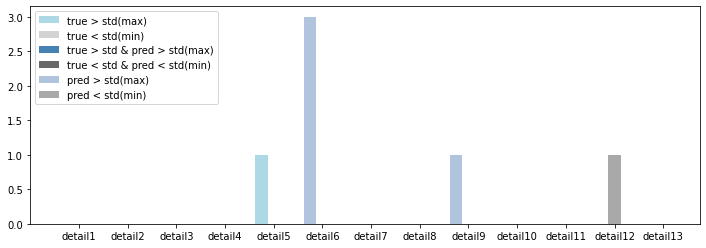

In [ ]:
"""
Execute example
"""
detail_00_max_wrong = np.zeros(13)
detail_00_min_wrong = np.zeros(13)
detail_01_max_wrong = np.zeros(13)
detail_01_min_wrong = np.zeros(13)
detail_10_max_wrong = np.zeros(13)
detail_10_min_wrong = np.zeros(13)

measure_std("0162B00100")
detail_wrong_pic(detail_00_max_wrong, detail_00_min_wrong, detail_01_max_wrong, detail_01_min_wrong, detail_10_max_wrong, detail_10_min_wrong)

#Prediction
##Error distribution histogram

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

# put prediction output file path, ex: 'pred.npy'
pred = np.load(folder_path+'pred.npy')
pred = pd.DataFrame(pred)
print(pred.shape) #(data_num, output_num)

Mounted at /content/drive
(1000, 26)


In [ ]:
"""
Error distribution histogram for prediction
"""
def detail_wrong_pic_pred(detail_max, detail_min):
  plt.figure(figsize=(12,4))
  labels=[]

  for i in range(1,14):
    labels.append("detail"+str(i))

  x = np.arange(1,14)
  width = 0.25

  plt.bar(x - width/2, detail_max, color="steelblue",label="pred > std(max)",width= 0.25)
  plt.bar(x + width/2, detail_min, color="darkgrey",label="pred < std(min)",width= 0.25)
  plt.xticks(range(1,14))
  plt.legend(loc='upper left')
  # plt.savefig(folder_path+'detail_wrong.jpg')
  plt.show()

In [ ]:
"""
規格判斷 for prediction
data為預測資料, partNo為料號編號
"""
def measure_std_pred(data, partNo):
  measure = []
  
  for data_num in range(len(data)):
    partNo = partNo
    if partNo == "0162B00100":
      max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    elif partNo == "0162B01100":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B01100-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    else:
      return "Error"

    for detail_num in range(13):
      if data[detail_num][data_num] > max_std[detail_num]: 
        detail_max_wrong[detail_num] += 1
      if data[detail_num+13][data_num] < min_std[detail_num]:
        detail_min_wrong[detail_num] += 1

  return measure

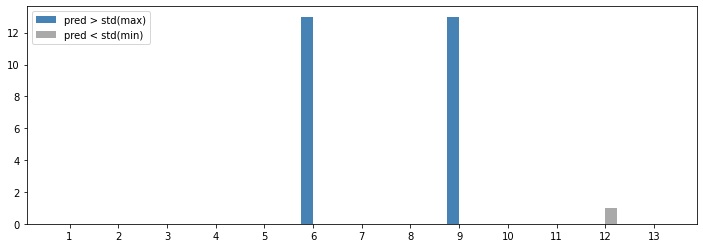

In [ ]:
"""
Execute example
"""
detail_max_wrong = np.zeros(13)
detail_min_wrong = np.zeros(13)

measure_std_pred(pred, "0162B00100")
detail_wrong_pic_pred(detail_max_wrong, detail_min_wrong)